In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [81]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [10]:
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [13]:
# View all of the classes that automap found
Measurments=Base.classes.measurement
Station=Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
session.query(Measurments.date).order_by(Measurments.date).first()

('2010-01-01')

In [26]:
inspector=inspect(engine)

In [28]:
inspector.get_table_names()

['measurement', 'station']

In [33]:
cols=inspector.get_columns('measurement')
# print(cols)
for c in cols:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [46]:
cols=inspector.get_columns('station')
# print(cols)
for c in cols:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


2017-08-23
Query Date:  2016-08-23 00:00:00


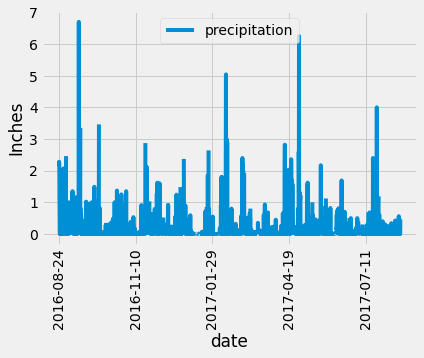

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_d=session.query(Measurments.date).order_by(Measurments.date.desc()).first()[0]
print(recent_d)
# Calculate the date one year from the last date in data set.
query_date = datetime.strptime(recent_d,'%Y-%m-%d') - dt.timedelta(days=365)
print("Query Date: ", query_date)
# Perform a query to retrieve the data and precipitation scores
sel=[Measurments.date,Measurments.prcp]
query = session.query(*sel).\
    filter(Measurments.date > query_date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prec=pd.DataFrame(query,columns=['date','precipitation'])
prec.set_index('date',inplace=True)

# Sort the dataframe by date
prec.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
prec.plot()
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.show()

In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [99]:
# Design a query to calculate the total number stations in the dataset
print(session.query(func.count(distinct(Measurments.station))).all()[0][0])

9


In [107]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
data=session.query(Measurments.station,func.count(Measurments.id)).group_by(Measurments.station).all()
data=pd.DataFrame(data,columns=['station','count']).sort_values('count',ascending=False)
data

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [109]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
print(session.query(func.min(Measurments.tobs),func.max(Measurments.tobs),func.avg(Measurments.tobs)).all())

[(53.0, 87.0, 73.09795396419437)]


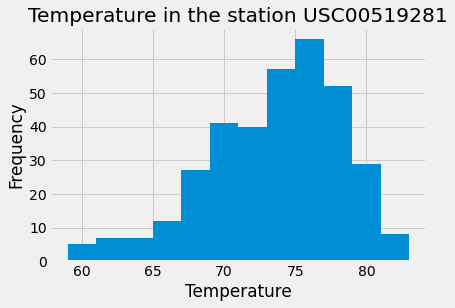

In [113]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel=[Measurments.date,Measurments.tobs]
query = session.query(*sel).\
    filter(Measurments.date > query_date).\
    filter(Measurments.station=='USC00519281').all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prec=pd.DataFrame(query,columns=['date','Temperature'])
prec.set_index('date',inplace=True)

# Sort the dataframe by date
prec.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
prec.hist(bins=12)
plt.title('Temperature in the station USC00519281')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

# Close session

In [140]:
# Close Session
session.close()